# Interpolation Errors

In order to talk about the errors in an interpolating polynomial, we must assume that there is a reasonably well behaved underlying function $f(x)$.  The error can the be characterized by asking: What is $f(x)-p_n(x)$?  

<!-- 
>  Theorem: Given *distinct* $x_0, x_1, ... , x_n$ in an interval $[a,b]$, and with $f(x)\in C^{n+1}[a,b]$, 
>  for any $x\in[a,b]$  there exists $\xi\in(a,b)$ such that   
>
>  $$ 
>     f(x)-p_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0}^n (x-x_j). 
>  $$ (inter_err)
>
-->

````{prf:theorem}
:label: thrm-err
Given *distinct* $x_0, x_1, ... , x_n$ in an interval $[a,b]$, and with $f(x)\in C^{n+1}[a,b]$, 
for any $x\in[a,b]$  there exists $\xi\in(a,b)$ such that   
```{math}
:label: inter_err
  f(x)-p_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0}^n (x-x_j). 
``` 
````

````{prf:proof}

Take some fixed $x\in[a,b]$.  If $x=x_k$ for some $k$ then the error formula {eq}`inter_err` gives zero (which is, indeed the true error as the interpolating polynomial agrees with the function at node points by definition).  If $x\neq x_k$, then let's define an auxiliary function

$$g(t)=f(t)-p_n(t) - \left[ f(x)-p_n(x) \right] \frac{(t-x_0)(t-x_1)...(t-x_n)}{(x-x_0)(x-x_1)...(x-x_n)}$$  

Now note that $g(t)=0$ for $t=x_k$ (for any $k$) because the numerator in the last term will contain the factor $(t-x_k)$ which is zero at $t=x_k$ and the first two terms cancel at $t=x_k$ as $f(x_k)=p_n(x_k)$ by definition of the interpolating polynomial.  Also note that $g(t)=0$ for $t=x$ as well since the fraction in the last term is one and the remaining terms cancel for $t=x$.  As a result, we see that $g(t)$ has $n+2$ zeros (at $x$ and at $x_0, x_1,...,x_n$).  

````


We now make use of  

````{prf:theorem} Rolle's Theorem  
:label: rolle

If $r(x)$ is a continuously differentiable function with $r(c)=r(d)=0$ then $r'(\xi)=0$ for some $\xi \in (c,d)$.  This is usually proved in first year calculus textbooks but is fairly obvious when you plot any reasonably behaved function that is zero at two points $c$ and $d$ which will have to look something like one of the below:

<img src="./img/rolle.svg" width="600">

````

Rolle's theorem implies that there must be a zero of $g'(t)$ between each of the zeros of $g(t)$ and hence $g'(t)$ must have $(n+1)$ zeros in $(a,b)$.  Following similar reasoning, $g''(t)$ has $n$ zeros.  Doing this recursively, we conclude that $g^{(n+1)}(t)$ has one zero in $(a,b)$ whose position we label as $t=\xi$.  while lower derivatives might be messy, it should not be too hard to convince yourself that the $(n+1)$st derivative must have the fairly simple form  

$$g^{(n+1)}(t)=f^{(n+1)}(t) - \left[ f(x)-p_n(x) \right] \frac{(n+1)!}{(x-x_0)(x-x_1)...(x-x_n)},$$  

where we have used the fact that $p_n(t)$ is a $n$th degree polynomial so that its $(n+1)$st derivative must be zero.  Now we have  

$$g^{(n+1)}(\xi)=0=f^{(n+1)}(\xi) - \left[ f(x)-p_n(x) \right] \frac{(n+1)!}{(x-x_0)(x-x_1)...(x-x_n)}.$$  

Rearranging this expression gives us the error  formula {eq}`inter_err`.  $\blacksquare$

There are a few things to note about the error formula,  

- Its form is remarkably similar to the remainder term (error) for the [Taylor series](../ErrorsModule/TaylorExample).  This should not be surprising as it should be clear that the interpolating polynomial should have the Taylor series as its limit if you gradually reduce the spacing between the nodes until they coincide.

- As with Taylor's remainder, it is not likely that we will know $f^{n+1}(\xi)$ given that we are using a polynomial approximation to evaluate $f(x)$.  However, it might still be possible to bound $f^{n+1}(x)$ and hence the error.

- The error formula for the interpolating polynomial does not depend on the form of the polynomial that we use.  This should be clear from the fact that we already showed that the polynomial itself is unique and we did not use the form of $p_n(x)$ in order to find the error.

- Unlike the error in Taylor's theorem, the error formula is a considerably more complicated polynomial.  It is not obvious this error polynomial is well behaved.  In fact, it often is *not* which we will discuss next.


## Runge's Phenomenon

Suppose, for example, we wish to interpolate the function $f(x)=1/(1+10x^2)$ on the interval $[-1,1]$ using polynomial interpolation.  Further, we will assume we have sampled $11$ points of this function (so $n=10$) evenly spaced over the interval.  Let's use the SciPy interpolation function to do this as illustrated below:

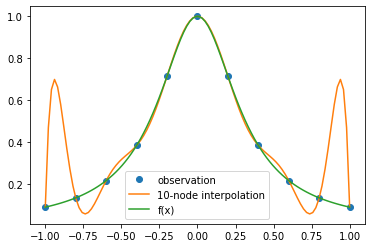

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import barycentric_interpolate
x_observed = np.linspace(-1.0, 1.0, 11)
y_observed = 1/(1+10.*x_observed**2)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
y_actual = 1/(1+10.*x**2)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="10-node interpolation")
plt.plot(x, y_actual, label="f(x)")
plt.legend()
plt.show()

It would appear that our interpolating function does a *terrible* job of approximating $f(x)$, *especially* near the ends of the interval.  Unfortunately, this is a rather typical result and is referred to as the [**Runge's phenomenon**](https://en.wikipedia.org/wiki/Runge%27s_phenomenon), named after [Carl Runge](https://en.wikipedia.org/wiki/Carl_Runge) who noticed the effect in 1901.  To understand the origin of this effect we examine the error formula {eq}`inter_err`.  From Equation {eq}`inter_err` it is clear that possible sources are

- $f^{n+1}(\xi)$ and keeping in mind that $\xi$ may be different for different $x$.

- The polynomial $E_n(x)=\prod_{j=0}^n (x-x_j)$.

In this case, $f^{n+1}(x)$ is large, switchs sign on $x \rightarrow -x$, but decreases in magnitude as we approach the edges of the interval $[-1,1]$.  i.e. it does not oscillate like we see in the plot.  However, a plot of $E_n(x)$ shows a match for the oscillating pattern of errors seen:

<img src="./img/Enx.svg" width="400">

It is a reasonable question to ask if there is anything we can do about this?  Your first thought might be to increase the density of the points (i.e. add more nodes) however this actually makes the situtation worse:

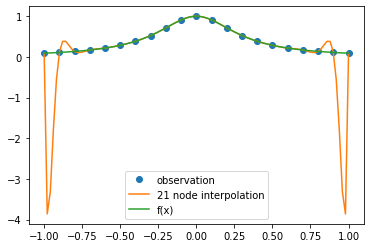

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import barycentric_interpolate
x_observed = np.linspace(-1.0, 1.0, 21)
y_observed = 1/(1+10.*x_observed**2)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
y_actual = 1/(1+10.*x**2)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="21 node interpolation")
plt.plot(x, y_actual, label="f(x)")
plt.legend()
plt.show()

Doubling the number of points has increased the (maximum) error at the edges of the interval by about a factor of eight.  The conclusion you should come to here is that **high order polynomial interpolation with equally spaced points is poorly conditioned.**  

However, the *equally spaced points* are actually the culprit here as can be seen by considering a different set of nodes:

$$ x_i=\cos\left( \frac{(2i+1)\pi}{2n+2} \right), \qquad\qquad i=0, 1, ..., n. $$

Changing our code to use these points gives for $n=10$

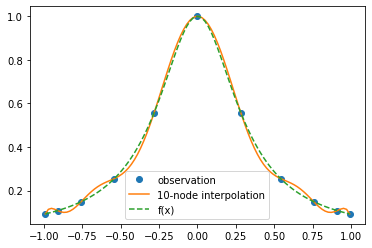

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import barycentric_interpolate
n = 10
x_observed = np.cos((2.*np.arange(0,n+1,1)+1.)*math.pi/(2.*n+2))
y_observed = 1./(1.+10.*x_observed**2)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
y_actual = 1/(1+10.*x**2)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="10-node interpolation")
plt.plot(x, y_actual, label="f(x)",linestyle='dashed')
plt.legend()
plt.show()

While the result here is not outstanding in that there are clearly visible errors, these errors are now fairly uniform over the whole interval and no longer concentrated at the edges.  If we now again double the number of points we get:

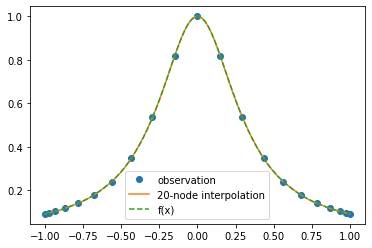

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import barycentric_interpolate
n = 20
x_observed = np.cos((2.*np.arange(0,n+1,1)+1.)*math.pi/(2.*n+2))
y_observed = 1./(1.+10.*x_observed**2)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
y_actual = 1/(1+10.*x**2)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="20-node interpolation")
plt.plot(x, y_actual, label="f(x)",linestyle='dashed')
plt.legend()
plt.show()

In dramatic contrast to what happened with equally spaced points, increasing the number of nodes now has resulted in the interpolating polynomial being nearly indistiguishable from the underlying function $f(x)$.  Why this particular choice of nodes is better is the subject of the next section.